In [39]:
%matplotlib inline  

# Python dependences
import os
import numpy as np   # Numpy - Python's numerical library
import matplotlib.pyplot as plt  # Matplotlib - Python's plotting library
from copy import deepcopy   # Python module for copying objects

# Input and Output Tools
# Catalogue and sources 
from hmtk.parsers.catalogue import CsvCatalogueParser   # Reads an earthquake catalogue from CSV
from hmtk.parsers.catalogue.csv_catalogue_parser import CsvCatalogueWriter  # Writes an earthquake catalogue to CSV
from hmtk.parsers.source_model.nrml04_parser import nrmlSourceModelParser  # Imports a source model from XML

# Plotting tools
from hmtk.plotting.mapping import HMTKBaseMap
from hmtk.plotting.seismicity.completeness import plot_stepp_1972
from hmtk.plotting.seismicity.catalogue_plots import plot_magnitude_time_scatter
from hmtk.plotting.seismicity.catalogue_plots import plot_depth_histogram
from hmtk.plotting.seismicity.catalogue_plots import plot_magnitude_time_density
from hmtk.plotting.seismicity.max_magnitude.cumulative_moment import plot_cumulative_moment 
from hmtk.plotting.seismicity.catalogue_plots import (plot_observed_recurrence, 
                                                      get_completeness_adjusted_table,
                                                      _get_catalogue_bin_limits)

# Seismicity tools: Events and declustering methods
from hmtk.seismicity.selector import CatalogueSelector
from hmtk.seismicity.declusterer.dec_afteran import Afteran 
from hmtk.seismicity.declusterer.dec_gardner_knopoff import GardnerKnopoffType1 
from hmtk.seismicity.declusterer.distance_time_windows import (GardnerKnopoffWindow, 
                                                               GruenthalWindow, 
                                                               UhrhammerWindow)

# Completeness tools
from hmtk.seismicity.completeness.comp_stepp_1971 import Stepp1971

# Seismicity tools: Recurrence methods
from hmtk.seismicity.occurrence.aki_maximum_likelihood import AkiMaxLikelihood
from hmtk.seismicity.occurrence.b_maximum_likelihood import BMaxLikelihood
from hmtk.seismicity.occurrence.kijko_smit import KijkoSmit
from hmtk.seismicity.occurrence.weichert import Weichert

# Seismicity tools: Recurrence methods
from hmtk.seismicity.max_magnitude.kijko_sellevol_fixed_b import KijkoSellevolFixedb
from hmtk.seismicity.max_magnitude.kijko_sellevol_bayes import KijkoSellevolBayes
from hmtk.seismicity.max_magnitude.kijko_nonparametric_gaussian import KijkoNonParametricGaussian
from hmtk.seismicity.max_magnitude.cumulative_moment_release import CumulativeMoment 

# Seismicity tools: Smoothed seismicity
from hmtk.seismicity.smoothing.smoothed_seismicity import SmoothedSeismicity 
from hmtk.seismicity.smoothing.kernels.isotropic_gaussian import IsotropicGaussian 

# To build source model
from hmtk.sources.source_model import mtkSourceModel
from hmtk.sources.point_source import mtkPointSource
from openquake.hazardlib.geo.point import Point
from openquake.hazardlib.mfd import TruncatedGRMFD
from openquake.hazardlib.geo.nodalplane import NodalPlane
from openquake.hazardlib.pmf import PMF
#from nrml.models import HypocentralDepth
#nrml.models import HypocentralDepth
print "Everything Imported OK!"

Everything Imported OK!


In [40]:
#Importing catalogue
catalogue_filename = '/media/sf_openquake_shared_files/Australia/catalogue/AUSTCAT_pref11_DB_main341_hmtk_format.csv'
parser = CsvCatalogueParser(catalogue_filename) # From .csv to hmtk

# Read and process the catalogue content in a variable called "catalogue"
catalogue = parser.read_file(start_year=1788, end_year=2010)

# How many events in the catalogue?
print "The catalogue contains %g events" % catalogue.get_number_events()

# What is the geographical extent of the catalogue?
bbox = catalogue.get_bounding_box()
print "Catalogue ranges from %.4f E to %.4f E Longitude and %.4f N to %.4f N Latitude\n" % bbox

The catalogue contains 36792 events
Catalogue ranges from 18.1228 E to 170.9110 E Longitude and -77.0311 N to -0.0530 N Latitude



In [41]:
catalogue.sort_catalogue_chronologically()
catalogue.data['magnitude']
index = catalogue.data['magnitude']>1.5
index
#min(catalogue.data['depth'])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


array([False,  True,  True, ...,  True,  True,  True], dtype=bool)

In [42]:
# Copying the catalogue and saving it under a new name "catalogue_clean"
catalogue_clean = deepcopy(catalogue)

# remove nan magnitudes
catalogue_clean.purge_catalogue(index)
catalogue_clean.sort_catalogue_chronologically()
catalogue_clean.data['magnitude']
catalogue_clean.data['year']
catalogue_clean.get_decimal_time()
catalogue_clean.data['longitude']

array([ 145.    ,  138.6   ,  138.6   , ...,  130.7749,  138.3639,
        121.1477])

In [43]:
catalogue_depth_clean = deepcopy(catalogue_clean)
index = catalogue_depth_clean.data['depth']>=0.
catalogue_depth_clean.purge_catalogue(index)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater_equal
  from ipykernel import kernelapp as app


In [44]:
catalogue_clean.get_number_events()

28749

In [45]:
source_model_file = "/media/sf_openquake_shared_files/Australia/zones/Aus_cont_testzone.xml"
parser = nrmlSourceModelParser(source_model_file)

# Parse the seismic sources and save them into a variable called "source_model"
source_model = parser.read_file("Aus Source Model 1") # You need to supply a name for the source model

Magnitude Error is missing - neglecting error bars!


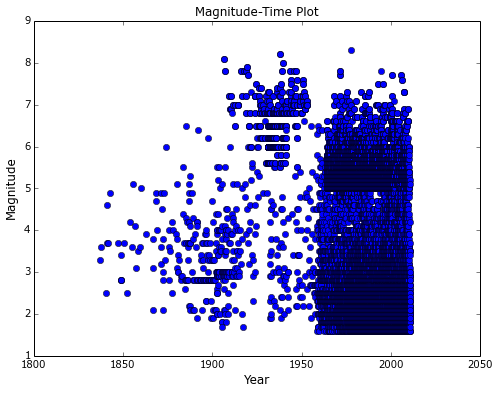

In [46]:
plot_magnitude_time_scatter(catalogue_clean, plot_error=False)

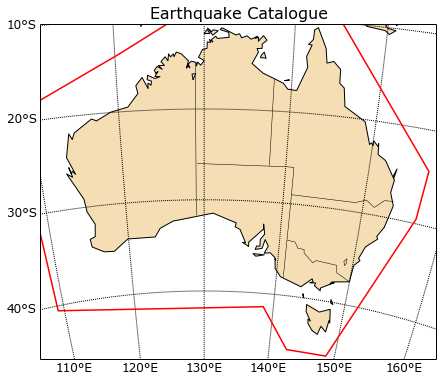

In [47]:
# Map configuration
llon, ulon, llat, ulat = catalogue_clean.get_bounding_box()
#map_config = {'min_lon': np.floor(llon), 'max_lon': np.ceil(ulon),
 #             'min_lat': np.floor(llat), 'max_lat': np.ceil(ulat), 'resolution':'c'}
map_config = {'min_lon': np.floor(105), 'max_lon': np.ceil(155),
              'min_lat': np.floor(-45), 'max_lat': np.ceil(-9), 'resolution':'c'}
# Creating a basemap - input a cconfiguration and (if desired) a title
basemap1 = HMTKBaseMap(map_config, 'Earthquake Catalogue')

# Adding the seismic sources
basemap1.add_source_model(source_model, area_border='r-', border_width=1.5, alpha=0.5)


110.2 155.828 -45.567 -10.0
Source ID: 1  Source Name: Continent   Number of Events: 14319


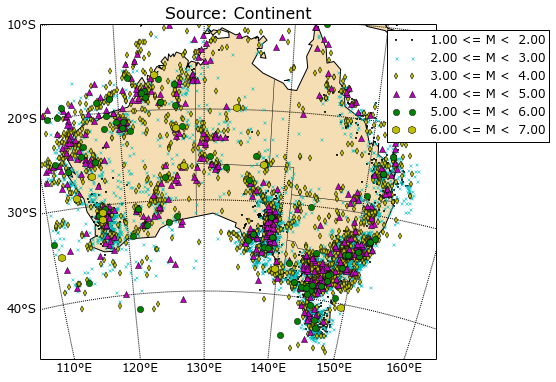

In [48]:
# Select catalogue from within sourcezone
selector1 = CatalogueSelector(catalogue_depth_clean, create_copy=True)
for source in source_model.sources:
    source.select_catalogue(selector1)
    
    llon, ulon, llat, ulat = source.catalogue.get_bounding_box()
    print llon, ulon, llat, ulat
    # Map the Source
    src_basemap = HMTKBaseMap(map_config, "Source: {:s}".format(source.name))
    print "Source ID: %s  Source Name: %s   Number of Events: %g" % (source.id, source.name,
                                                                     source.catalogue.get_number_events())
    # Add on the catalogue
    src_basemap.add_catalogue(source.catalogue, overlay=False)


    

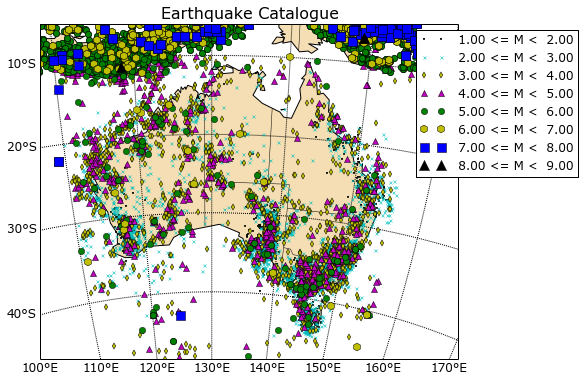

In [49]:
# Map configuration
llon, ulon, llat, ulat = catalogue_clean.get_bounding_box()
#map_config = {'min_lon': np.floor(llon), 'max_lon': np.ceil(ulon),
#              'min_lat': np.floor(llat), 'max_lat': np.ceil(ulat), 'resolution':'c'}
map_config = {'min_lon': np.floor(100), 'max_lon': np.ceil(160),
              'min_lat': np.floor(-45), 'max_lat': np.ceil(-4), 'resolution':'c'}
# Creating a basemap - input a cconfiguration and (if desired) a title
basemap1 = HMTKBaseMap(map_config, 'Earthquake Catalogue')


# Adding the catalogue to the basemap
# In this case we will 'close' the figure after rendering, we do this by setting 'overlay=False'
# This is also the default option
# If we wanted to add another layer on top, we would set the overlay to True
basemap1.add_catalogue(catalogue_depth_clean, overlay=False)

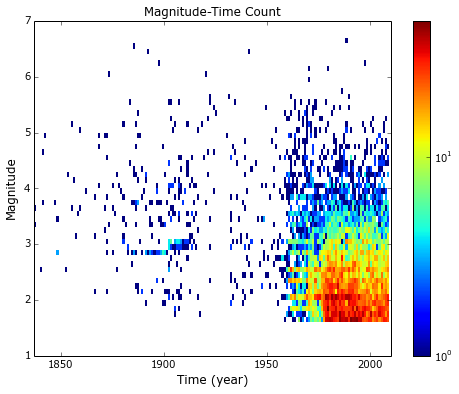

In [50]:
magnitude_bin_width = 0.1  # In magnitude units
time_bin_width = 1.0 # In years
plot_magnitude_time_density(source.catalogue, magnitude_bin_width, time_bin_width)

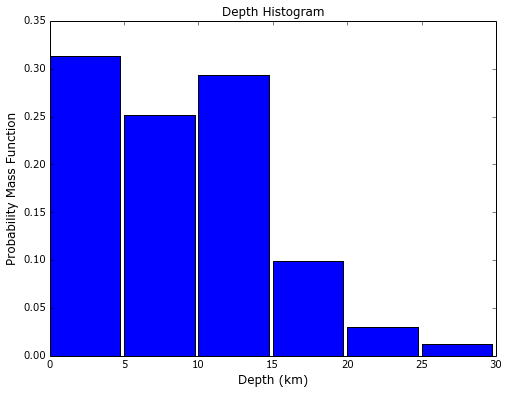

In [51]:
# Shows depth histogram every 5 km  
plot_depth_histogram(source.catalogue, 5., normalisation=True)

2010.0 3.5
1978.0 3.5
1964.0 4.0
1900.0 5.5
1837.0 5.5


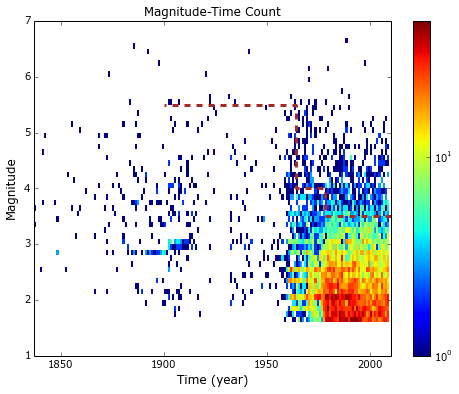

In [52]:
completeness_table_a = np.array([[1980., 2.0],
                                 [1964., 3.5],
                                 [1900., 5.5]])
completeness_table_a = np.array([[1978., 3.5],
                                 [1964., 4.0],
                                 [1900., 5.5]])
#completeness_table_a = np.array([[1900., 5.0]])
plot_magnitude_time_density(source.catalogue, 0.1, 1.0,
                            completeness=completeness_table_a)

In [53]:
from hmtk.seismicity.occurrence.weichert import Weichert

recurrence_estimator = Weichert()

recurrence_config = {"magnitude_interval": 0.1}

bval, sigma_b, aval, sigma_a = recurrence_estimator.calculate(source.catalogue,
                                                              recurrence_config,
                                                              completeness_table_a)

print "a = %.3f (+/- %.3f),  b = %.3f (+/-%.3f)" % (aval, sigma_a, bval, sigma_b)

a = 4.400 (+/- 0.015),  b = 0.885 (+/-0.027)


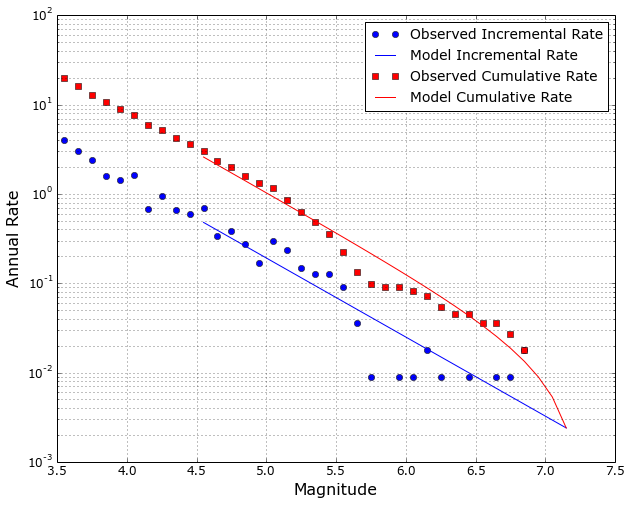

In [54]:
from hmtk.plotting.seismicity.occurrence.recurrence_plot import plot_recurrence_model
from openquake.hazardlib.mfd import TruncatedGRMFD
mfd0 = TruncatedGRMFD(4.5, 7.2, 0.1, aval, bval)
plot_recurrence_model(mfd0, source.catalogue, completeness_table_a, 0.1)

In [55]:
from hmtk.seismicity.smoothing.smoothed_seismicity import SmoothedSeismicity
smoothing_config = {"BandWidth": 50.,
                    "Length_Limit": 3.,
                    "increment": 0.1}
smoother = SmoothedSeismicity([100.,160.,0.1,-45.,-5,0.1,0.,20., 20.], bvalue = 1)
#smoothed_grid = smoother.run_analysis(source_model.sources[0].catalogue, smoothing_config, completeness_table=completeness_table_a)
smoothed_grid = smoother.run_analysis(source.catalogue, smoothing_config, completeness_table=completeness_table_a)
smoother_filename = '/media/sf_openquake_shared_files/Australia/catalogue/smoothed_%i_%i_mmin_%.1f_0.1.csv' % \
                        (smoothing_config["BandWidth"], smoothing_config["Length_Limit"],
                        completeness_table_a[0][-1])
smoother.write_to_csv(smoother_filename)


Smoothing Total Rate Comparison - Observed: 14098.6, Smoothed: 14099.4


In [56]:
smoother_filename = '/media/sf_openquake_shared_files/Australia/catalogue/smoothed_%i_%i_mmin_%.1f_0.1.csv' % \
                        (smoothing_config["BandWidth"], smoothing_config["Length_Limit"],
                        completeness_table_a[0][-1])
smoother.write_to_csv(smoother_filename)

In [57]:
# Build nrml input file of point sources
source_list = []
#i=0
min_mag = 4.5
max_mag = 7.2
bval = 1.0 # just define as 1 for time being
# Read in data again to solve number fomatting issue in smoother.data
# For some reason it just returns 0 for all a values
data = np.genfromtxt(smoother_filename, delimiter = ',', skip_header = 1)
print max(data[:,4])
print data[:,4]
print len(data[:,4])
for j in range(len(data[:,4])):
#    print smoother.data[j,:]
    identifier = 'FSS_' + str(j)
    name = 'Frankel_' + str(j)
    point = Point(data[j,0],data[j,1],
                data[j,2])
    rate = data[j,4]
    aval = np.log10(rate) + bval*completeness_table_a[0][1]
   # print aval
    mfd = TruncatedGRMFD(min_mag, max_mag, 0.1, aval, bval)
    hypo_depth_dist = PMF([(1.0, 10.0)])
    nodal_plane_dist = PMF([(0.25, NodalPlane(0, 30, 90)),
                            (0.25, NodalPlane(90, 30, 90)),
                            (0.25, NodalPlane(180, 30, 90)),
                            (0.25, NodalPlane(270, 30, 90))])
    point_source = mtkPointSource(identifier, name, geometry=point, mfd=mfd,
                           mag_scale_rel = 'WC1994', rupt_aspect_ratio=1.5,
                           upper_depth = 0.1, lower_depth = 20.0,
                           trt = 'Non_cratonic', nodal_plane_dist = nodal_plane_dist,
                           hypo_depth_dist = hypo_depth_dist)
    source_list.append(point_source)
#    i+=1
#    if j==1000:
#        break
    
source_model = mtkSourceModel(identifier=0, name='Frankel_50_3',
                              sources = source_list)
source_model.serialise_to_nrml('/media/sf_openquake_shared_files/Australia/catalogue/smoothed_frankel_50_3_mmin_%.1f_0.1.xml' % \
                              completeness_table_a[0][-1])

3.65012
[  4.53514000e-05   5.76931000e-05   6.66566000e-05 ...,   4.74745000e-04
   2.29729000e-04   1.05738000e-04]
95737


[ 100.05  100.15  100.25 ...,  159.75  159.85  159.95]
[ -5.05  -5.05  -5.05 ..., -44.95 -44.95 -44.95]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log10


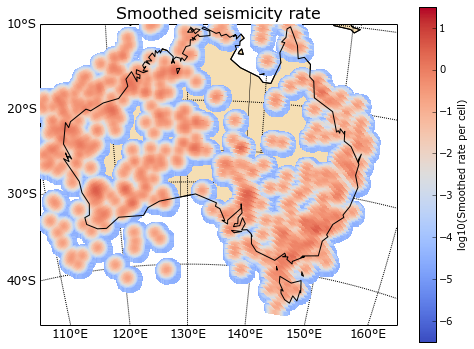

In [63]:
# Map configuration
llon, ulon, llat, ulat = source.catalogue.get_bounding_box()
#map_config = {'min_lon': np.floor(llon), 'max_lon': np.ceil(ulon),
#              'min_lat': np.floor(llat), 'max_lat': np.ceil(ulat), 'resolution':'c'}
map_config = {'min_lon': np.floor(105), 'max_lon': np.ceil(155),
              'min_lat': np.floor(-45), 'max_lat': np.ceil(-9), 'resolution':'c'}
# Creating a basemap - input a cconfiguration and (if desired) a title
basemap1 = HMTKBaseMap(map_config, 'Smoothed seismicity rate')
basemap1.m.drawmeridians(np.arange(llat, ulat, 5))
basemap1.m.drawparallels(np.arange(llon, ulon, 5))
print smoother.data[:,0]
print smoother.data[:,1]
# Adding the smoothed grip to the basemap
#sym = (2., 3.,'cx')
x,y = basemap1.m(smoother.data[:,0], smoother.data[:,1])
basemap1.m.scatter(x, y, marker = 's', c = np.log10(smoother.data[:,4]), cmap = plt.cm.coolwarm, zorder=10, lw=0,
                   vmin=-6.5, vmax = 1.5 )
#basemap1.m.scatter(x, y, marker = 's', c = np.arange(-7.5, -0.5, 0.1), cmap = plt.cm.coolwarm, zorder=10, lw=0)
basemap1.m.drawcoastlines(linewidth=1, zorder=50) # Add coastline on top
#basemap1.m.drawmeridians(np.arange(llat, ulat, 5))
#basemap1.m.drawparallels(np.arange(llon, ulon, 5))
plt.colorbar(label='log10(Smoothed rate per cell)')
#plt.legend()
#basemap1.m.scatter(x, y, marker = 's', c = smoother.data[:,4], cmap = plt.cm.coolwarm, zorder=10)
#basemap1.m.scatter([150],[22], marker='o')
#basemap1.fig.show()

#(smoother.data[0], smoother.data[1])
#basemap1.add_catalogue(catalogue_depth_clean, erlay=False)
plt.savefig('/media/sf_openquake_shared_files/Australia/catalogue/smoothed_%i_%i_%.1f_0.1.png' % \
                        (smoothing_config["BandWidth"], smoothing_config["Length_Limit"], \
                        completeness_table_a[0][-1]))